In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from glob import glob

In [2]:
import matplotlib
matplotlib.rcParams.update({'font.size':18})
matplotlib.rcParams.update({'font.family':'serif'})

**The Plan**

- read in KIC 2 TIC reference
- read in Kepler periods from Amy McQuillan's paper
- read all the TESS rot estimates from my script
- combine all TESS rot files
- xmatch TESS to Kepler
- Comparison plot!

In [3]:
tess_dir = '/Users/james/Desktop/helloTESS/outputs/'

# if you want ALL the sectors
rfiles = glob(tess_dir + '*rot_out.csv')

In [4]:
# but, we only want Sectors 14 & 15
rot1 = pd.read_csv(tess_dir + 'sector014_rot_out.csv')
rot2 = pd.read_csv(tess_dir + 'sector015_rot_out.csv')

print(rot1.shape, rot2.shape)

(19993, 12) (19996, 12)


Text(0, 0.5, 'L-S Period (days)')

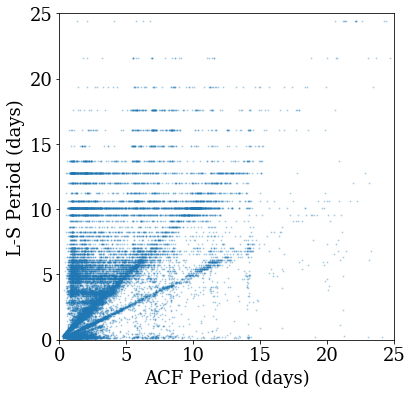

In [5]:
plt.figure(figsize=(6,6))
plt.scatter(rot1['acf_per'],rot1['LSper'], s=1, alpha=0.25)
# plt.scatter(rot2['acf_per'],rot2['LSper'], s=1, alpha=0.25)

plt.xlim(0,25)
plt.ylim(0,25)
plt.xlabel('ACF Period (days)')
plt.ylabel('L-S Period (days)')

In [6]:
rot1.columns

Index(['Unnamed: 0', 'TIC', 'LSper', 'LSamp', 'LSmed', 'LSstd', 'acf_pk',
       'acf_per', 'bls_per', 'bls_ampl', 'ecl_num', 'ecl_dep'],
      dtype='object')

In [7]:
rot = pd.concat([rot1, rot2], ignore_index=True, sort=False)
rot.shape

(39989, 12)

In [16]:
# comparisons to make: 
#     Kepler to Sector 14, 
#     Kepler to Sector 15, 
#     Sector 14 to Sector 15
Kper = pd.read_csv('./amq_Period_Table.txt')
KICTIC = pd.read_csv('/Users/james/Dropbox/research_projects/kic2tic/KIC2TIC.csv')

print(Kper.shape, KICTIC.shape)

(1570, 8) (199421, 2)


In [9]:
KTper = Kper.merge(KICTIC, left_on='KID', right_on='KIC', how='inner')

KTper.shape

(1570, 10)

In [10]:
Trot1 = rot1.merge(KTper, left_on='TIC', right_on='TIC')
Trot1.shape

(49, 21)

In [11]:
Trot2 = rot2.merge(KTper, left_on='TIC', right_on='TIC')
Trot2.shape

(19, 21)

In [158]:
pd.concat((Trot1, Trot2))['KIC'].unique().size

49

In [12]:
Trot1.columns

Index(['Unnamed: 0', 'TIC', 'LSper', 'LSamp', 'LSmed', 'LSstd', 'acf_pk',
       'acf_per', 'bls_per', 'bls_ampl', 'ecl_num', 'ecl_dep', 'KID', 'Teff',
       'logg', 'Mass', 'Period', 'Period_Err', 'Amplitude', 'Flag', 'KIC'],
      dtype='object')

Text(0.5, 1.0, 'Sector 014')

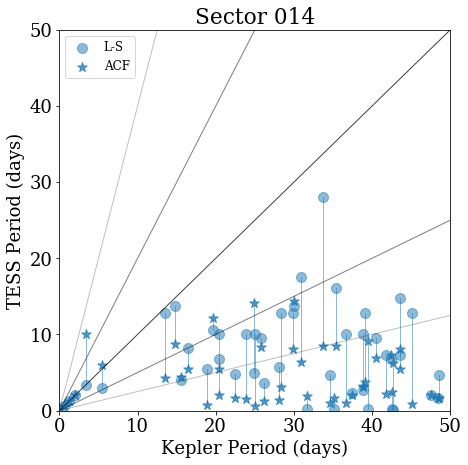

In [153]:
plt.figure(figsize=(7,7))
plt.scatter(Trot1['Period'], Trot1['LSper'], alpha=0.5, c='C0', s=100, label='L-S')
plt.scatter(Trot1['Period'], Trot1['acf_per'], alpha=0.75, c='C0', s=100, marker='*', label='ACF')
for k in range(len(Trot1)):
    plt.plot([Trot1['Period'][k], Trot1['Period'][k]], [Trot1['LSper'][k], Trot1['acf_per'][k]], 
             lw=0.5, c='C0')

plt.plot([.1,50], [.1, 50], c='k', lw=1, alpha=0.75)
plt.plot([.1,50], [.05, 25], c='k', lw=1, alpha=0.5)
plt.plot([.1,50], [.025, 12.5], c='k', lw=1, alpha=0.25)
plt.plot([.1,50], [.2, 100], c='k', lw=1, alpha=0.5)
plt.plot([.1,50], [.4, 200], c='k', lw=1, alpha=0.25)

plt.xlim(0,50)
plt.ylim(0,50)
plt.legend(fontsize=12)

plt.xlabel('Kepler Period (days)')
plt.ylabel('TESS Period (days)')
plt.title('Sector 014')

Text(0.5, 1.0, 'Sector 015')

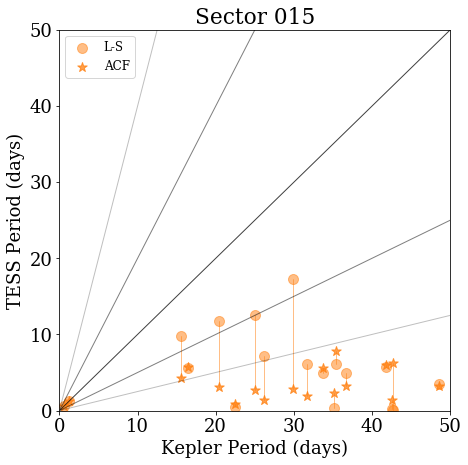

In [154]:
plt.figure(figsize=(7,7))
plt.scatter(Trot2['Period'], Trot2['LSper'], alpha=0.5, c='C1', s=100, label='L-S')
plt.scatter(Trot2['Period'], Trot2['acf_per'], alpha=0.75, c='C1', s=100, marker='*', label='ACF')
for k in range(len(Trot2)):
    plt.plot([Trot2['Period'][k], Trot2['Period'][k]], [Trot2['LSper'][k], Trot2['acf_per'][k]], 
             lw=0.5, c='C1')

plt.plot([.1,50], [.1, 50], c='k', lw=1, alpha=0.75)
plt.plot([.1,50], [.05, 25], c='k', lw=1, alpha=0.5)
plt.plot([.1,50], [.025, 12.5], c='k', lw=1, alpha=0.25)
plt.plot([.1,50], [.2, 100], c='k', lw=1, alpha=0.5)
plt.plot([.1,50], [.4, 200], c='k', lw=1, alpha=0.25)

plt.xlim(0,50)
plt.ylim(0,50)
plt.legend(fontsize=12)

plt.xlabel('Kepler Period (days)')
plt.ylabel('TESS Period (days)')
plt.title('Sector 015')

12 3


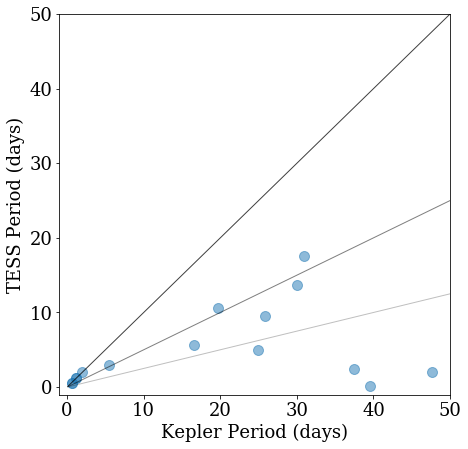

In [159]:
plt.figure(figsize=(7,7))
ok1 = (Trot1['acf_pk'] > 0.01) & (Trot1['LSamp'] > 0.02)
ok2 = (Trot2['acf_pk'] > 0.01) & (Trot2['LSamp'] > 0.02)

plt.scatter(Trot1['Period'][ok1], Trot1['LSper'][ok1], alpha=0.5, c='C0', s=100, label='L-S')
# plt.scatter(Trot1['Period'][ok1], Trot1['acf_per'][ok1], alpha=0.75, c='C0', s=100, marker='*', label='ACF')
# for k in range(len(Trot1[ok1].values)):
#     plt.plot([Trot1['Period'][ok1].values[k], Trot1['Period'][ok1].values[k]], 
#              [Trot1['LSper'][ok1].values[k], Trot1['acf_per'][ok1].values[k]], 
#              lw=1, c='C0')

plt.scatter(Trot2['Period'][ok2], Trot2['LSper'][ok2], alpha=0.5, c='C0', s=100)
# plt.scatter(Trot2['Period'][ok2], Trot2['acf_per'][ok2], alpha=0.75, c='C0', s=100, marker='*')
# for k in range(len(Trot2[ok2].values)):
#     plt.plot([Trot2['Period'][ok2].values[k], Trot2['Period'][ok2].values[k]], 
#              [Trot2['LSper'][ok2].values[k], Trot2['acf_per'][ok2].values[k]], 
#              lw=1, c='C0')

plt.plot([.1,50], [.1, 50], c='k', lw=1, alpha=0.75)
plt.plot([.1,50], [.05, 25], c='k', lw=1, alpha=0.5)
plt.plot([.1,50], [.025, 12.5], c='k', lw=1, alpha=0.25)
# plt.plot([.1,50], [.2, 100], c='k', lw=1, alpha=0.5)
# plt.plot([.1,50], [.4, 200], c='k', lw=1, alpha=0.25)

plt.xlim(-1,50)
plt.ylim(-1,50)

# plt.legend(fontsize=12)

plt.xlabel('Kepler Period (days)')
plt.ylabel('TESS Period (days)')

print(sum(ok1), sum(ok2))

Text(0, 0.5, 'TESS / Kepler Period')

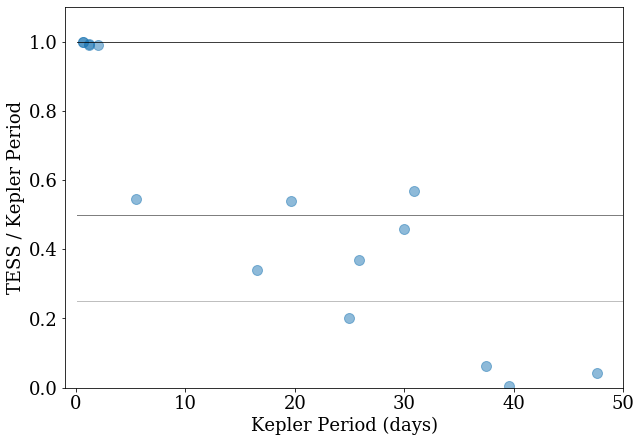

In [148]:
plt.figure(figsize=(10,7))

plt.scatter(Trot1['Period'][ok1], Trot1['LSper'][ok1]/Trot1['Period'][ok1], alpha=0.5, c='C0', s=100, label='L-S ')
# plt.scatter(Trot1['Period'][ok1], Trot1['acf_per'][ok1]/Trot1['Period'][ok1], alpha=0.75, 
#             c='C0', s=100, marker='*', label='ACF')
# for k in range(len(Trot1[ok1].values)):
#     plt.plot([Trot1['Period'][ok1].values[k], Trot1['Period'][ok1].values[k]], 
#              [Trot1['LSper'][ok1].values[k]/Trot1['Period'][ok1].values[k], 
#               Trot1['acf_per'][ok1].values[k]/Trot1['Period'][ok1].values[k]], 
#              lw=1, c='C0')

plt.scatter(Trot2['Period'][ok2], Trot2['LSper'][ok2]/Trot2['Period'][ok2], alpha=0.5, c='C0', s=100)
# plt.scatter(Trot2['Period'][ok2], Trot2['acf_per'][ok2]/Trot2['Period'][ok2], alpha=0.75, 
#             c='C0', s=100, marker='*')
# for k in range(len(Trot2[ok2].values)):
#     plt.plot([Trot2['Period'][ok2].values[k], Trot2['Period'][ok2].values[k]], 
#              [Trot2['LSper'][ok2].values[k]/Trot2['Period'][ok2].values[k], 
#               Trot2['acf_per'][ok2].values[k]/Trot2['Period'][ok2].values[k]], 
#              lw=1, c='C0')

plt.plot([.1,50], [1,1], c='k', lw=1, alpha=0.75)
plt.plot([.1,50], [.5,.5], c='k', lw=1, alpha=0.5)
plt.plot([.1,50], [.25, .25], c='k', lw=1, alpha=0.25)

plt.xlim(-1,50)
plt.ylim(0,1.1)

plt.xlabel('Kepler Period (days)')
plt.ylabel('TESS / Kepler Period')

In [139]:
print(Trot1['KIC'][ok1])
print(Trot2['KIC'][ok2])

1     9201463
5     8507979
14    4672900
16    4175398
24    4758595
26    2285598
27    5562069
29    4761031
30    5206997
38    8935655
39    9726699
43    2692708
Name: KIC, dtype: int64
7     9726699
9     8507979
17    7692454
Name: KIC, dtype: int64


In [140]:
pd.concat((Trot1['KIC'][ok1],Trot2['KIC'][ok2])).unique()

array([9201463, 8507979, 4672900, 4175398, 4758595, 2285598, 5562069,
       4761031, 5206997, 8935655, 9726699, 2692708, 7692454])